<h1>Natural Image Change Detection Psychophysics</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

<h3>Load average psychophysics data for 8 natural images</h3>

In [2]:
from swdb2017.brain_observatory import psychophysics

In [3]:
df = psychophysics.get_natural_image_psychophysics_df()
df

,change_image,77,66,63,62,65,61,85,69
0,77,0.146608,0.712329,0.729730,0.723684,0.700000,0.894737,0.785714,0.890244
1,66,0.246753,0.208000,0.585366,0.629630,0.720930,0.774648,0.727273,0.901408
2,63,0.347826,0.686747,0.206573,0.600000,0.840580,0.774648,0.844156,0.842105
3,62,0.360000,0.649351,0.679487,0.202783,0.824742,0.814815,0.898305,0.851852
4,65,0.202532,0.628571,0.547945,0.700000,0.209821,0.690141,0.827586,0.864198
5,61,0.220779,0.764706,0.550725,0.397260,0.757143,0.205607,0.901235,0.807229
6,85,0.174419,0.444444,0.461538,0.444444,0.535211,0.837838,0.229907,0.851351
7,69,0.162500,0.471429,0.500000,0.493976,0.527027,0.688889,0.514286,0.269598


In [4]:
r = df.iloc[:,1:].values

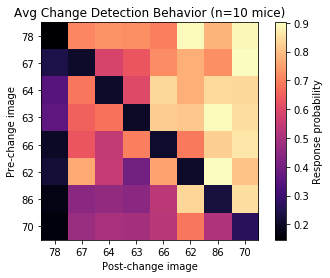

In [5]:
fig,ax = plt.subplots(1,1)
im = ax.imshow(r,cmap='magma')
plt.colorbar(im,ax=ax,label='Response probability')
ax.set_ylabel('Pre-change image')
ax.set_xlabel('Post-change image')
ax.set_xticks(range(8)); ax.set_yticks(range(8))
ax.set_xticklabels(df.change_image.values+1)
ax.set_yticklabels(df.change_image.values+1)
ax.set_title('Avg Change Detection Behavior (n=10 mice)')

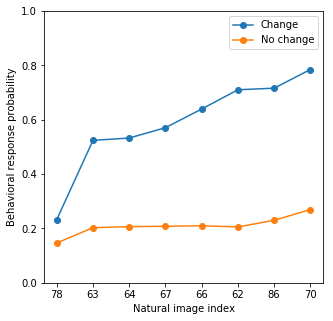

In [6]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
avg = r.mean(axis=0) # compute avg detectability
idx = np.argsort(avg) # get index for sorting by avg resp probability
ax.plot(avg[idx],'-o',label='Change')
ax.plot(np.diagonal(r)[idx],'-o',label='No change')
ax.set_xticks(range(8))
ax.set_xticklabels(df.change_image.values[idx]+1)
ax.set_ylim(0,1)
ax.set_ylabel('Behavioral response probability')
ax.set_xlabel('Natural image index')
ax.legend()

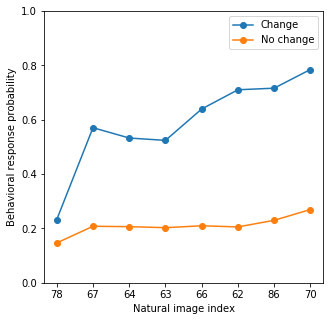

In [7]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(r.mean(axis=0),'-o',label='Change')
ax.plot(np.diagonal(r),'-o',label='No change')
ax.set_xticks(range(8))
ax.set_xticklabels(df.change_image.values+1)
ax.set_ylim(0,1)
ax.set_ylabel('Behavioral response probability')
ax.set_xlabel('Natural image index')
ax.legend()

<h3> Get natural image templates and display </h3>

In [8]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'
manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')

In [9]:
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [10]:
expts = pd.DataFrame(boc.get_ophys_experiments(stimuli=['natural_scenes']))
data_set = boc.get_ophys_experiment_data(expts.id[0])
ni_templates = data_set.get_stimulus_template(stimulus_name='natural_scenes')

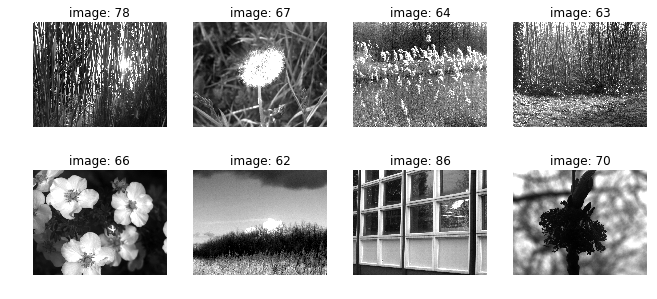

In [11]:
fig,ax = plt.subplots(2,4,figsize=(11,5))
ax = ax.ravel()
for i,stim_ind in enumerate(df.change_image.values):
    ax[i].imshow(ni_templates[stim_ind,:,:],cmap='gray')
    ax[i].set_title('image: %s'%str(stim_ind+1)) # add 1 to index to match brain-map.org
    ax[i].axis('off')